# Time evolution plots using US Dept of Ed data

In [1]:
## Python packages - 
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('notebook_repr_html',False)

In [2]:
#In Python: Define a database name 
dbname = 'opensyl'
username = 'parama'

In [3]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url

postgres://parama@localhost/opensyl


In [4]:
# connect:
try:
    con = psycopg2.connect(database = 'opensyl', user = 'parama' , password = 'pargop')
except:
    print 'Unable to connect!'
    

In [5]:
grad_student = pd.read_csv("top50univs.csv",names=['inst_name'])

In [6]:
grad_student.to_sql('top_schoolnames', engine)

In [6]:
grad_student = pd.read_csv("gradstudent.csv",names=['fclass','name','year','gender','ncount'])

In [8]:
grad_student.head(5)

   fclass                                   name  year  gender  ncount
0     4.0  Architecture and Environmental Design  1966    Male       5
1     4.0  Architecture and Environmental Design  1967    Male       4
2     4.0  Architecture and Environmental Design  1968    Male       4
3     4.0  Architecture and Environmental Design  1983  Female       5
4     4.0  Architecture and Environmental Design  1983    Male      29

In [165]:
new = grad_student[grad_student.gender != 'Unknown Gender']

In [9]:
grad_student.shape

(1784, 5)

In [13]:
new.gender.shape

(1583,)

In [166]:
#workmat = new.drop('name',1)
workmat = new

In [22]:
girl.head()

    fclass  year  fcount
3      3.0  1983       5
5      3.0  1984       3
7      3.0  1985      12
9      3.0  1986       4
11     3.0  1987       6

In [167]:
boy = workmat[workmat.gender=='Male'].rename(columns={'ncount':'mcount'})
girl = workmat[workmat.gender=='Female'].rename(columns={'ncount':'fcount'})

In [168]:
boy = boy.drop('gender',1)
girl = girl.drop('gender',1)

In [169]:
combine = pd.merge(left=boy,right=girl, left_on=('fclass','year','name') ,right_on=('fclass','year','name'))


In [147]:
combine.head()

   fclass                                   name  year  mcount  fcount
0     4.0  Architecture and Environmental Design  1983      29       5
1     4.0  Architecture and Environmental Design  1984      22       3
2     4.0  Architecture and Environmental Design  1985      24      12
3     4.0  Architecture and Environmental Design  1986      23       4
4     4.0  Architecture and Environmental Design  1987      27       6

In [170]:
combine['ratio'] = combine.fcount/combine.mcount

In [171]:
socsc = combine[combine.fclass==1.0].drop('fclass',1)
physc = combine[combine.fclass==2.0].drop('fclass',1)
engg = combine[combine.fclass==3.0].drop('fclass',1)
proff = combine[combine.fclass==4.0].drop('fclass',1)
human = combine[combine.fclass==5.0].drop('fclass',1)

In [150]:
socsc.head()

           name  year  mcount  fcount     ratio
511  Psychology  1966     894     245  0.274049
512  Psychology  1967    1030     265  0.257282
513  Psychology  1968    1131     333  0.294430
514  Psychology  1969    1350     416  0.308148
515  Psychology  1970    1446     444  0.307054

In [123]:
proff[120:120]

          name  year  mcount  fcount     ratio
165  Education  1984    3337    3471  1.040156
166  Education  1985    3242    3491  1.076804
167  Education  1986    3036    3613  1.190053
168  Education  1987    2896    3557  1.228246
169  Education  1988    2847    3514  1.234282
170  Education  1989    2670    3610  1.352060
171  Education  1990    2758    3751  1.360044
172  Education  1991    2696    3748  1.390208
173  Education  1992    2688    3976  1.479167
174  Education  1993    2748    3921  1.426856
175  Education  1994    2612    4090  1.565850
176  Education  1995    2546    4092  1.607227
177  Education  1996    2579    4187  1.623497
178  Education  1997    2394    4123  1.722222
179  Education  1998    2421    4131  1.706320
180  Education  1999    2339    4199  1.795212
181  Education  2000    2260    4179  1.849115
182  Education  2001    2251    4100  1.821413
183  Education  2002    2196    4299  1.957650
184  Education  2003    2256    4395  1.948138

# sample code
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

result = boys.groupby('year').apply(get_max_record)

boys.groupby('name')['prop'].mean()

In [72]:
import numpy as np
%matplotlib inline

In [172]:
y1 = np.array(socsc.groupby('year')['ratio'].mean())
y2 = np.array(physc.groupby('year')['ratio'].mean())
y3 = np.array(engg.groupby('year')['ratio'].mean())
y4 = np.array(proff.groupby('year')['ratio'].mean())
y5 = np.array(human.groupby('year')['ratio'].mean())

In [173]:
x = []
for egroup in combine.groupby('year'):
    x.append(egroup[0])

In [174]:
len(x),len(y1)

(41, 41)

In [73]:
from scipy.signal import savgol_filter
plt.plot(x, savgol_filter(y1,25,5))

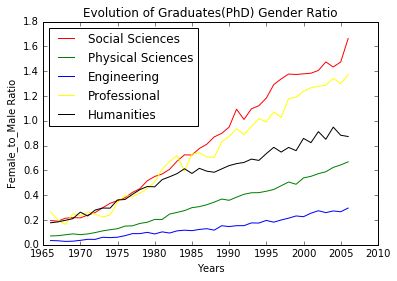

In [175]:
fig = plt.figure()
plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'black'])

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)

plt.xlabel('Years')
plt.ylabel('Female_to_Male Ratio')
plt.title('Evolution of Graduates(PhD) Gender Ratio')

plt.legend(['Social Sciences', 'Physical Sciences', 'Engineering', 'Professional', 'Humanities'], loc='upper left')

fig.savefig('timeline_3.png')

In [ ]:
df = pandas.read_excel(open('your_xls_xlsx_filename','rb'), sheetname='Sheet 1')

In [12]:
faculty.head()

   year    male  female   ninst
0  1900   19151    4717   977.0
1  1910   29132    7348   951.0
2  1920   35807   12808  1041.0
3  1930   60017   22369  1409.0
4  1940  106328   40601  1708.0

In [11]:
faculty = pd.read_csv("faculty_data.csv")

In [13]:
y= faculty.female/faculty.male
x = faculty.year

In [14]:
type(y)

pandas.core.series.Series

In [154]:
y

0     0.136280
1     0.572325
2     0.244411
3     0.246306
4     0.252231
5     0.357695
6     0.372711
7     0.381847
8     0.325116
9     0.282307
10    0.300578
11    0.409186
12    0.542749
13    0.706030
14    0.891035
15    0.951271
dtype: float64

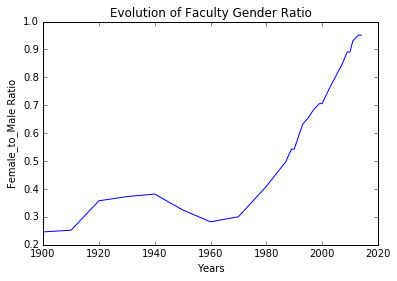

In [15]:
fig = plt.figure()
#plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'black'])

plt.plot(x, y)


plt.xlabel('Years')
plt.ylabel('Female_to_Male Ratio')
plt.title('Evolution of Faculty Gender Ratio')

fig.savefig('timeline_3.png')

In [16]:
gradr = pd.read_csv("graduation_rates.csv",names=['year','bachelors','masters','phd'])

In [17]:
gradr.bachelors = gradr.bachelors/(100-gradr.bachelors)
gradr.masters = gradr.masters/(100-gradr.masters)
gradr.phd = gradr.phd/(100-gradr.phd)


/home/parama/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


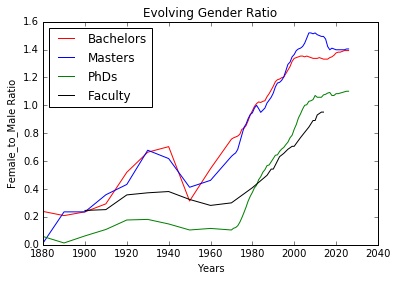

In [18]:
fig = plt.figure()
plt.gca().set_color_cycle(['red', 'blue', 'green', 'black'])

plt.plot(gradr.year, gradr.bachelors)
plt.plot(gradr.year, gradr.masters)
plt.plot(gradr.year, gradr.phd)
plt.plot(x, y)

plt.xlabel('Years')
plt.ylabel('Female_to_Male Ratio')
plt.title('Evolving Gender Ratio')

plt.legend(['Bachelors', 'Masters', 'PhDs','Faculty'], loc='upper left')

fig.savefig('timeline_2.png')

In [19]:
gradr.head()

   year  bachelors   masters       phd
0  1880   0.239157  0.013171  0.059322
1  1890   0.209190  0.236094  0.013171
2  1900   0.236094  0.236094  0.063830
3  1910   0.293661  0.358696  0.109878
4  1920   0.519757  0.432665  0.177856

In [20]:
faculty.head()

   year    male  female   ninst
0  1900   19151    4717   977.0
1  1910   29132    7348   951.0
2  1920   35807   12808  1041.0
3  1930   60017   22369  1409.0
4  1940  106328   40601  1708.0

In [21]:
x,y

(0     1900
 1     1910
 2     1920
 3     1930
 4     1940
 5     1950
 6     1960
 7     1970
 8     1980
 9     1987
 10    1989
 11    1990
 12    1991
 13    1993
 14    1995
 15    1997
 16    1999
 17    2000
 18    2001
 19    2003
 20    2005
 21    2007
 22    2009
 23    2010
 24    2011
 25    2013
 26    2014
 Name: year, dtype: int64, 0     0.246306
 1     0.252231
 2     0.357695
 3     0.372711
 4     0.381847
 5     0.325116
 6     0.282307
 7     0.300578
 8     0.409186
 9     0.498018
 10    0.542749
 11    0.542749
 12    0.572020
 13    0.631503
 14    0.655210
 15    0.685018
 16    0.706030
 17    0.706030
 18    0.727167
 19    0.768197
 20    0.806173
 21    0.843732
 22    0.891025
 23    0.891035
 24    0.930766
 25    0.951310
 26    0.951271
 dtype: float64)